In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

# Data Imports

In [3]:
Harris_i = pd.read_csv('Data_Folder/HarrisPartI.csv')
Harris_ii = pd.read_csv('Data_Folder/HarrisPartII.csv')
Harris_iii = pd.read_csv('Data_Folder/HarrisPartIII.csv')
VandenBerg = pd.read_csv('Data_Folder/vandenBerg_table2.csv')
Krause21 = pd.read_csv('Data_Folder/Krause21.csv')

In [4]:
#Combine harris i and iii into 1 dataframe

#exclude id column from harris iii
Harris_iii_IDnone = Harris_iii.T.drop('ID')

#Combine Dataframes
Harris_i_iii = Harris_i.join(Harris_iii_IDnone.T)

# Figures

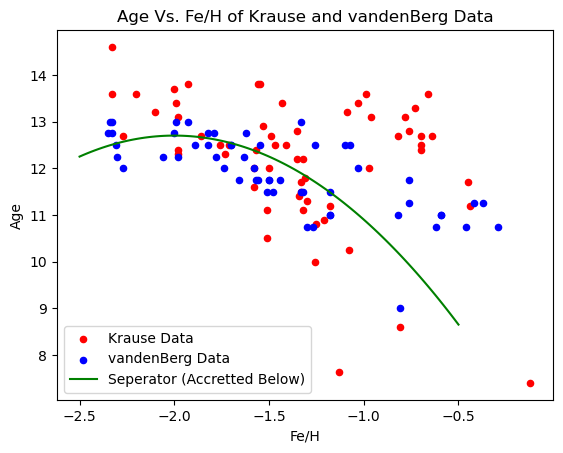

In [5]:
## Creating FeH / Age plot for Krause and vandenBerg data

#setting x and y data from Krause for FeH/Age plots
Krause21x = pd.read_csv('Data_folder/Krause21.csv', usecols=['FeH'])
Krause21y = pd.read_csv('Data_Folder/Krause21.csv', usecols=['Age'])
#setting x and y data from vandenBerg for FeH/Age plots
VandenBergx = pd.read_csv('Data_Folder/vandenBerg_table2.csv', usecols=['FeH'])
VandenBergy = pd.read_csv('Data_Folder/vandenBerg_table2.csv', usecols=['Age'])

#Plotting data (Age/FeH) for comparison with (Belokurov, Kravtsov, 2024) - ["In-situ vs. Accretted..." (Figure 3)]
plt.scatter(Krause21x, Krause21y, color='red', label='Krause Data', s=20)
plt.scatter(VandenBergx, VandenBergy, color='blue', label='vandenBerg Data', s=20)

#Creating line
b = 12.7  #peak of curve
m = -1.8  #tightness of curve
x = np.linspace(-2.5, -0.5, num=100)  #limits of curve
y = m*(x+2)**2+b  #the curve (+2 shifts curve left)

#Adding the line to plot
Accretted_Line = plt.plot(x, y, color='green', label='Seperator (Accretted Below)')

plt.legend()
plt.xlabel('Fe/H')
plt.ylabel('Age')
plt.title('Age Vs. Fe/H of Krause and vandenBerg Data')

plt.show()

In [6]:
## Identifying the data from the FeH / Age plot for Krause and vandenBerg data

#Changing columns names to be able to compare in mask
Krause21x_reset = Krause21x.rename(columns={'FeH': 'Accretted'})
Krause21y_reset = Krause21y.rename(columns={'Age': 'Accretted'})
VandenBergx_reset = VandenBergx.rename(columns={'FeH': 'Accretted'})
VandenBergy_reset = VandenBergy.rename(columns={'Age': 'Accretted'})

#Creating mask (selects all data less than created line as 'True')
mask1 = Krause21y_reset < m*(Krause21x_reset+2)**2+b 
mask2 = VandenBergy_reset < m*(VandenBergx_reset+2)**2+b

#Joining mask dataframe with object name
Krause21_FeHAge_data = pd.read_csv('Data_Folder/Krause21.csv', usecols=['Object']).join(mask1)
VandenBerg_FeHAge_data = pd.read_csv('Data_Folder/vandenBerg_table2.csv',usecols=['#NGC']).join(mask2)

#Filtering out False values
filtered_Krause21_FeHAge_data = Krause21_FeHAge_data[Krause21_FeHAge_data.Accretted]
filtered_VandenBerg_FeHAge_data = VandenBerg_FeHAge_data[VandenBerg_FeHAge_data.Accretted]

In [7]:
## Cleaning up FeH / Age data

Krause21_FeHAge_list = filtered_Krause21_FeHAge_data["Object"].tolist() #selecting only GC names and changing format to list
#print(Krause21_FeHAge_list)

VandenBerg_FeHAge_list = filtered_VandenBerg_FeHAge_data["#NGC"].tolist()
VandenBerg_FeHAge_list.remove("XXXX") #removing invalid names
VandenBerg_FeHAge_list.remove("XXXX") #and again

VandenBerg_FeHAge_list_modified = [] #creating empty list

#adding 'NGC' to the vandenBerg names for comparison with Krause names
for GC in VandenBerg_FeHAge_list:
    VandenBerg_FeHAge_list_modified.append("NGC" + GC)

#combining lists from Krause and vandenBerg
VandenBerg_Krause_FeHAge_list = VandenBerg_FeHAge_list_modified + Krause21_FeHAge_list

#removing duplicates
FeHAge_list = [] #creating empty list

for GC in Krause21_FeHAge_list:
    if GC not in FeHAge_list:
        FeHAge_list.append(GC)

for GC in VandenBerg_FeHAge_list_modified:
    if GC not in FeHAge_list:
        FeHAge_list.append(GC)

for GC in FeHAge_list:
    print(GC)

NGC362
NGC1261
NGC1851
NGC1904
NGC2298
NGC2808
NGC3201
NGC4833
NGC5053
NGC5272
NGC5897
NGC5904
NGC6101
NGC6139
NGC6205
NGC6535
NGC6584
NGC6715
NGC6934
NGC6981
NGC7089
Ruprecht106
Palomar12
NGC288
NGC4147
NGC4590
NGC5024
NGC5286
NGC5466
NGC5986
NGC6254
NGC6541
NGC6656


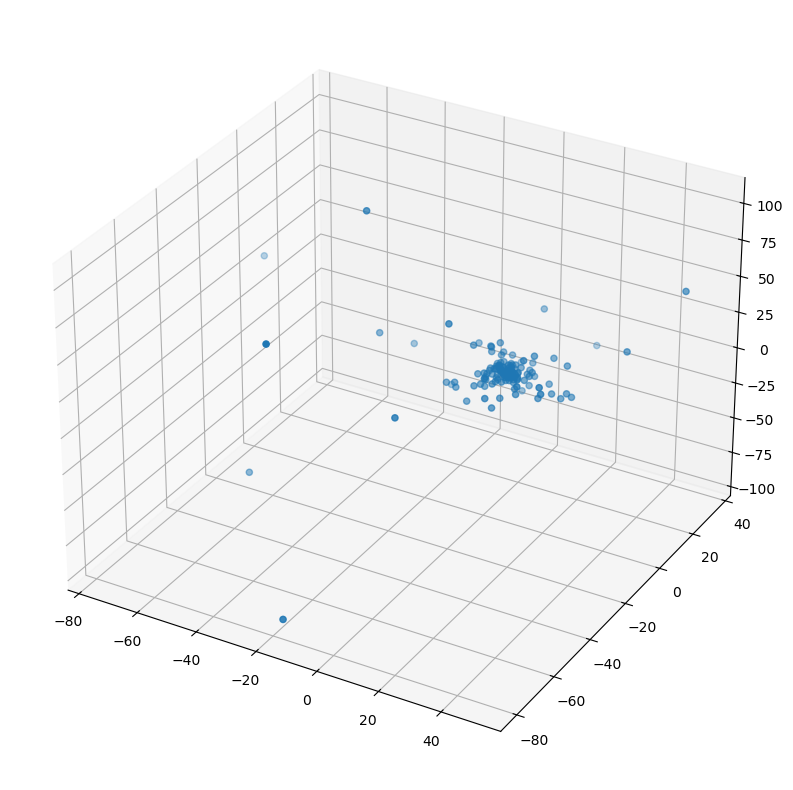

In [8]:
# The aim of this block of code is to create a 3D scatterplot of the Harris Part 1 data.
# This can then be used to identify GC near the outer halo which are likely globular clusters

# This code takes Part 1 of the Harris data and seperates the X, Y, and Z coordinates into seperate lists
HarrisIX = pd.read_csv('Data_folder/HarrisPartI.csv', usecols=['X'])
HarrisIY = pd.read_csv('Data_folder/HarrisPartI.csv', usecols=['Y'])
HarrisIZ = pd.read_csv('Data_folder/HarrisPartI.csv', usecols=['Z'])

# These next lines of code create a 3D scatterplot of the X, Y, and Z coordinates:
# The figsize parameters have been chosen by scanning the HarrisPartI.csv file and checking
# a rough range of the largest values
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

# These two lines make a visual graph of the scatterplot
ax.scatter(HarrisIX, HarrisIY, HarrisIZ)
plt.show()

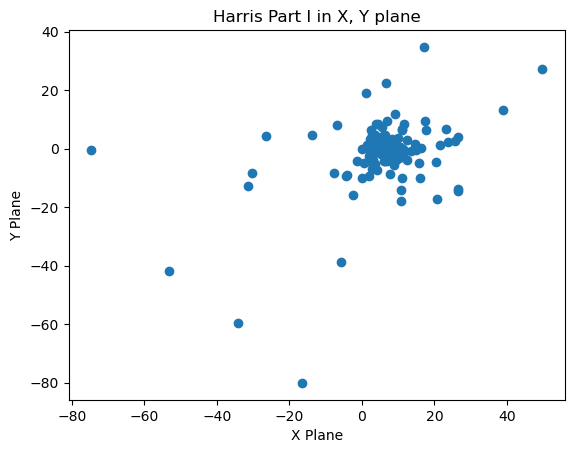

<function matplotlib.pyplot.ion() -> 'AbstractContextManager'>

In [9]:
# This block of code plots the Harris Part I in the X, Y axis
# The scatterplots include a cursor meaning we can pick out the accreted globular clusters off the scatterplot

# First we need to import the cursor feature from the matplotlib package:
from matplotlib.widgets import Cursor
import matplotlib.pyplot as plt


# Then, we need to define the figure and axis or else the cursor function does not work:
fig, ax = plt.subplots()

# Now we can plot Harris I in X, Y and add the cursor
ax.scatter(HarrisIX, HarrisIY)
ax.set_title('Harris Part I in X, Y plane')
cursor = Cursor(ax, useblit=True, color='red', linewidth=1)

plt.xlabel('X Plane')
plt.ylabel('Y Plane')

plt.show()
plt.ion

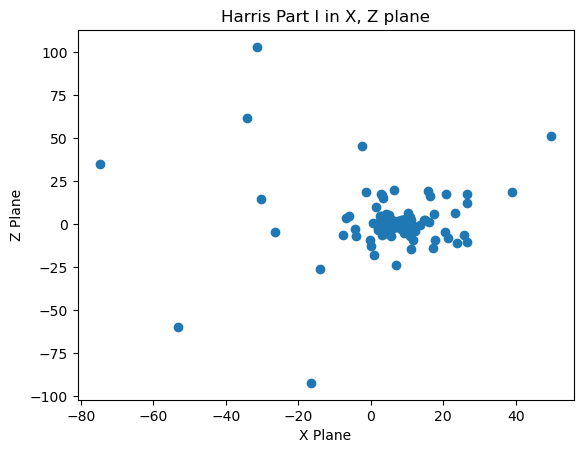

<function matplotlib.pyplot.ion() -> 'AbstractContextManager'>

In [10]:
# Harris Part I in the X, Z axis
# First we import the cursor feature from the matplotlib package:
from matplotlib.widgets import Cursor
import matplotlib.pyplot as plt

# Then, we  define the figure and axis
fig, ax = plt.subplots()

# Next we can plot Harris I in X, Z
ax.scatter(HarrisIX, HarrisIZ)
ax.set_title('Harris Part I in X, Z plane')
cursor = Cursor(ax, useblit=True, color='red', linewidth=1)

plt.xlabel('X Plane')
plt.ylabel('Z Plane')

plt.show()
plt.ion

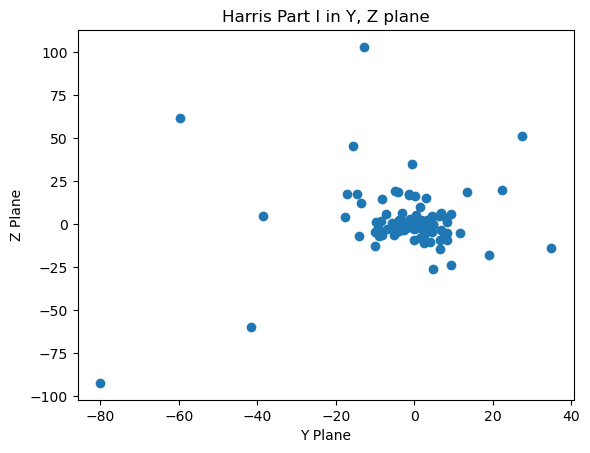

<function matplotlib.pyplot.ion() -> 'AbstractContextManager'>

In [11]:
# Harris Part I in the Y, Z axis
# First we import the cursor feature from the matplotlib package:
from matplotlib.widgets import Cursor
import matplotlib.pyplot as plt

# Then, we  define the figure and axis
fig, ax = plt.subplots()

# Next we can plot Harris I in Y, Z
ax.scatter(HarrisIY, HarrisIZ)
ax.set_title('Harris Part I in Y, Z plane')
cursor = Cursor(ax, useblit=True, color='red', linewidth=1)

plt.xlabel('Y Plane')
plt.ylabel('Z Plane')

plt.show()
plt.ion

In [12]:
# The following code will be used as a filter
# Using the scatterplots graphed above, we can pick out potential accreted globular clusters (of which there should be about 5 based on the 3D scatterplot)
# essentially the 2D scatterplots above help us choose boundaries where we can see the galactic halo. In the halo, we will find the accreted GCs

# First, we should set the limits on X, Y, Z for accreted GCs
x_min = 35
x_max = -13
y_min = 18
y_max = -35
z_min = 11
z_max = -50

# Now we set up the arrays we are going to use below
x_values = HarrisIX.values #the '.values' Converts HarrisIX to a numpy array from a pandas data frame - which makes the filter below work
y_values = HarrisIY.values
z_values = HarrisIZ.values
cluster_names = pd.read_csv('Data_folder/HarrisPartI.csv', usecols=['ID']).to_numpy() #the '.to_numpy()' defines cluster_names as a list of strings


# Need a way of saving the names of the accreted globular clusters to a list
accreted_gcs = []

# Now, we can filter the data based on these boundaries
# Let's go through HarrisIX first:
i = 0
while i < len(x_values):
    if x_values[i] <= x_max or x_values[i] >= x_min:
        accreted_gcs.append(cluster_names[i])
    i = i + 1
# This is fine for the X values because we are starting with an empty array
# Going forward, we will need to check that the gc added to the list of accreted gcs is not already entered
# The next cell writes a function for this.

In [13]:
def duplicate_detecor(some_list, some_name):
    k = 0
    duplicates = 0
    while k < len(some_list):
        if some_name == some_list[k]:
            duplicates = duplicates + 1
            k = k + 1
        else:
            k = k + 1
    return (duplicates)

In [14]:
# Now we can pick out any additional globular clusters for the y values, using the detect duplicates function
# Let's go through HarrisIY next:
i = 0
while i < len(y_values):
    if y_values[i] <= y_max or y_values[i] >= y_min:
        if duplicate_detecor(accreted_gcs, cluster_names[i]) == 0:
            accreted_gcs.append(cluster_names[i])
    i = i + 1

# Finally, we can also do this for the globular clusters with z values very distant from the centre:
i = 0
while i < len(z_values):
    if z_values[i] <= z_max or z_values[i] >= z_min:
        if duplicate_detecor(accreted_gcs, cluster_names[i]) == 0:
            accreted_gcs.append(cluster_names[i])
    i = i + 1
    
# Lastly, we can print off the list of accreted galaxy clusters in a nicer format. 
i = 0
for i in range(len(accreted_gcs)):
    print(accreted_gcs[i][0])

Whiting 1
AM 1
Eridanus
Pal 2
NGC 2419
Ko 2
Pal 3
Pal 4
Pal 14
Pal 15
Pyxis
NGC 6229
NGC 7006
Pal 13
Ko 1
NGC 4147
NGC 5024
NGC 5053
AM 4
NGC 5466
NGC 5634
NGC 5694
NGC 5824
Pal 5


In [15]:
## Combining all suspected acretted GCs

All_Acretted_GCs = [] #creating empty list

for GC in accreted_gcs:
    All_Acretted_GCs.append(GC[0])

for GC in FeHAge_list:
    if GC not in All_Acretted_GCs:
        All_Acretted_GCs.append(GC)

for GC in All_Acretted_GCs:
    print(GC)

Whiting 1
AM 1
Eridanus
Pal 2
NGC 2419
Ko 2
Pal 3
Pal 4
Pal 14
Pal 15
Pyxis
NGC 6229
NGC 7006
Pal 13
Ko 1
NGC 4147
NGC 5024
NGC 5053
AM 4
NGC 5466
NGC 5634
NGC 5694
NGC 5824
Pal 5
NGC362
NGC1261
NGC1851
NGC1904
NGC2298
NGC2808
NGC3201
NGC4833
NGC5053
NGC5272
NGC5897
NGC5904
NGC6101
NGC6139
NGC6205
NGC6535
NGC6584
NGC6715
NGC6934
NGC6981
NGC7089
Ruprecht106
Palomar12
NGC288
NGC4147
NGC4590
NGC5024
NGC5286
NGC5466
NGC5986
NGC6254
NGC6541
NGC6656


In [36]:
## Combining suspected accreted from Vand+krause and checking high velocity dispersion
High_sigvdf = Harris_i_iii[Harris_i_iii['sig_v']>=15]
Low_sigvdf = Harris_i_iii[Harris_i_iii['sig_v']<=5]

Low_sigvdf['ID'], All_Acretted_GCs # visual comparison of elements

# None of high sig_v galaxies occur in accretted GC from other physical properties
    #Paper indicated importance of RELATION between metallicities etc, cannot do that with incomplete information-> mention this as 'interesting' in video
accrete_check = []


if any(item in All_Acretted_GCs for item in Low_sigvdf['ID']):
      accrete_check.append(item)
accrete_check

['NGC6656']